Inmport the necessary packages and fetch data from yFinance

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set the style for plots
sns.set(style='whitegrid')

# Fetch data for a specific stock, e.g., Apple (AAPL)
ticker = 'AAPL'
stock_data = yf.download(ticker, start='2020-01-01', end='2023-01-01')

# Display the first few rows of the data
stock_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960464,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251129,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826866,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484360,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650345,132079200


In [3]:
stock_data.info

<bound method DataFrame.info of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02   74.059998   75.150002   73.797501   75.087502   72.960464   
2020-01-03   74.287498   75.144997   74.125000   74.357498   72.251129   
2020-01-06   73.447502   74.989998   73.187500   74.949997   72.826866   
2020-01-07   74.959999   75.224998   74.370003   74.597504   72.484360   
2020-01-08   74.290001   76.110001   74.290001   75.797501   73.650345   
...                ...         ...         ...         ...         ...   
2022-12-23  130.919998  132.419998  129.639999  131.860001  130.782578   
2022-12-27  131.380005  131.410004  128.720001  130.029999  128.967529   
2022-12-28  129.669998  131.029999  125.870003  126.040001  125.010132   
2022-12-29  127.989998  130.479996  127.730003  129.610001  128.550949   
2022-12-30  128.410004  129.949997  127.430000  129.929993  128.868317   

     

We have decided to investigate the Financial data for Apple 's s stock price between the 1st of January 2020 to the 1st of January 2023. Please note that the dates do not include weekends and public holidays.

### Exploratory Data Analysis

In [4]:
# Basic statistics
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,756.000000,756.000000,756.000000,756.000000,756.000000,7.560000e+02
mean,130.231998,131.892775,128.614983,130.311812,128.230001,1.120920e+08
std,30.596429,30.841435,30.287325,30.566496,30.563734,5.602586e+07
min,57.020000,57.125000,53.152500,56.092499,54.632893,3.519590e+07
25%,115.924374,117.275000,114.129997,115.739374,113.236624,7.636470e+07
50%,135.794998,137.200005,133.750000,135.379997,133.632828,9.493580e+07
75%,150.259998,151.902504,149.029995,150.704998,148.914688,1.296327e+08
max,182.630005,182.940002,179.119995,182.009995,179.481110,4.265100e+08


Like we mentioned earlier, there are only 756 days instead of 1096 because weekends and public holidays are not included. We also notice that the data types for valuesis numeric which means that models such as Regression can work well. Since also each column has 756 calues, it means there might be no existence of missing values.

What might also be of great interest to investors is the closing price which tells us the last price at which the stock is traded at during a particular trading day.

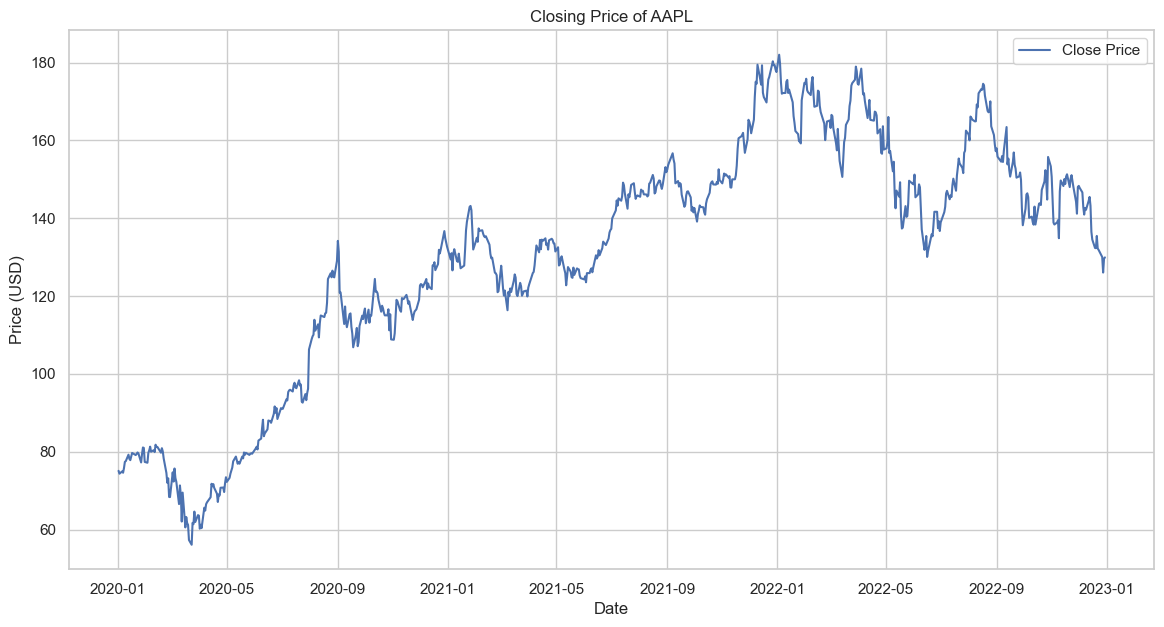

In [5]:
# Plot the closing price
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'], label='Close Price')
plt.title(f'Closing Price of {ticker}')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

As we can recall, 2020 was the year when the world was affected by Covid. Can we say Covid had an impact on Apple's stock price. Wwe can however see that when the world began to recover from the effects of Covid-19, the Apple 's stock also begun to experience a steady growth.

Another important metric is volume which easures the amount of security that gets bought and sold over a period of time. And for our case, we are looking at the Volume per day, that is the number of security traded between daily open and close.

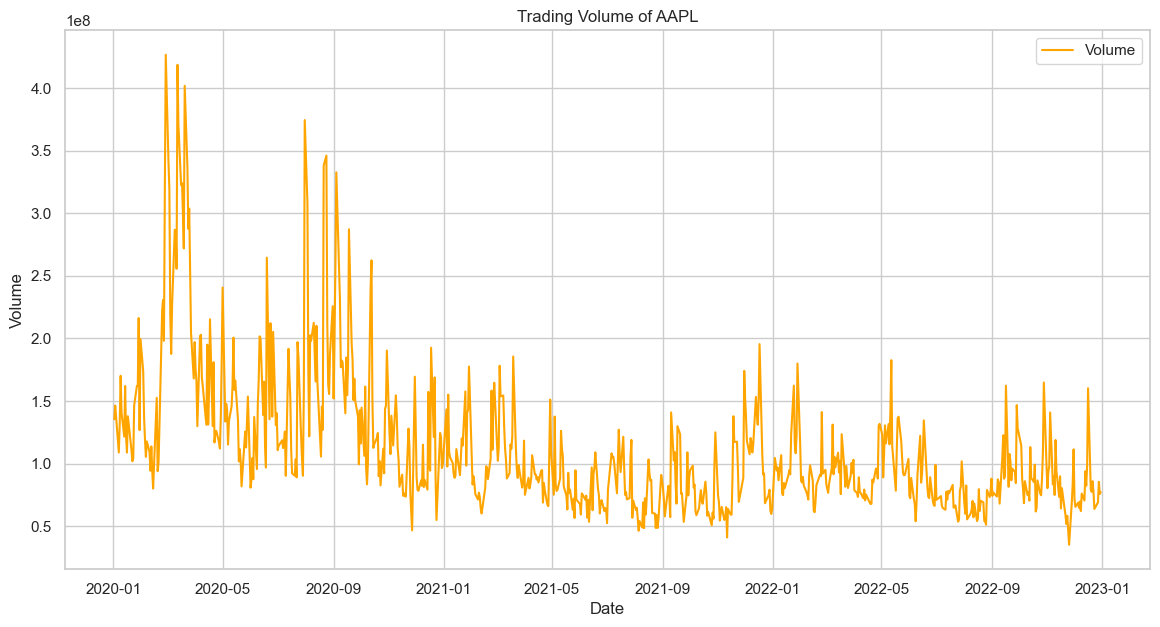

In [6]:
# Plot volume
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Volume'], label='Volume', color='orange')
plt.title(f'Trading Volume of {ticker}')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

Although the closing price was relatively low during 2020, Volume of Apple Stock changing hands was high and varying a lot. But from 2021 it has been steady, this can allude to the fact that the stock price is now high, inhibiting buyers from taking advantage, also the current stockholders might be confident in their stock hence they are reluctant to sell.

Both these metrics are important for predictions and understanding how Financial markerts work.

### Plot Moving Averages

Moving Average smooths out price data by creating a constantly updated average price.

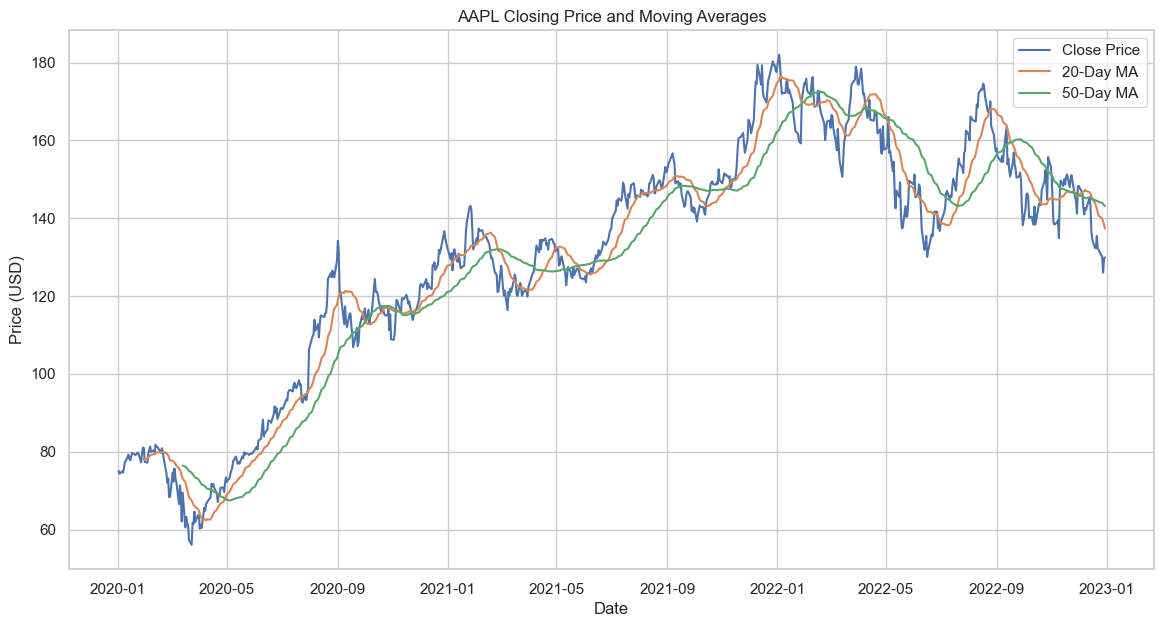

In [7]:
# Calculate moving averages
stock_data['MA20'] = stock_data['Close'].rolling(window=20).mean()
stock_data['MA50'] = stock_data['Close'].rolling(window=50).mean()

# Plot moving averages
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'], label='Close Price')
plt.plot(stock_data['MA20'], label='20-Day MA')
plt.plot(stock_data['MA50'], label='50-Day MA')
plt.title(f'{ticker} Closing Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

A 50 day moving average still captures the trend of the data without including the noise.

## Predicting Stock Price Using LSTM

#### 1. Prepare the data

Preparing the data is going to involve :

    - splitting the data into training and test sets
    - scale the data for better performance using LSTM
    - prepare the data in a better suitable format for time series forecasting

In [8]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Fetch data for Apple (AAPL)
ticker = 'AAPL'
apple_data = yf.download(ticker, start='2020-01-01', end='2023-03-31')
# Preparing the data
data = stock_data[['Close']]
data = data.dropna()

[*********************100%%**********************]  1 of 1 completed


In [9]:
data.head()

,Close
Date,
2020-01-02,75.087502
2020-01-03,74.357498
2020-01-06,74.949997
2020-01-07,74.597504
2020-01-08,75.797501


In [10]:
# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Creating a function to prepare the dataset
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

# Define time_step
time_step = 50

# Split the data into training and testing datasets
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

# Create the training and testing datasets
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape the input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

#### 2. Build and Train the LSTM Model

In this next phase, we will be:

    - Define the LSTM model architecture.
    - Compile and train the model

In [12]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=1)




553/553 [==============================] - 16s 21ms/step - loss: 0.0075


#### 3. Make Predictions

Now that we have built, let us predict on the remaining 20% to see how the stock will be for the next coming months.And for this, we will :

    - Use the trained model to predict stock prices.
    - Inverse the scaling to get actual price values.

In [13]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform to get actual values
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

4/4 [==============================] - 0s 14ms/step


#### 4. Evaluate the model

Understand that we are in 2024, and this data ends in 2023, this means we still have the opportunity to evaluate if our model predicted accurately.We will be comparing the Predicted values with the Actual values.

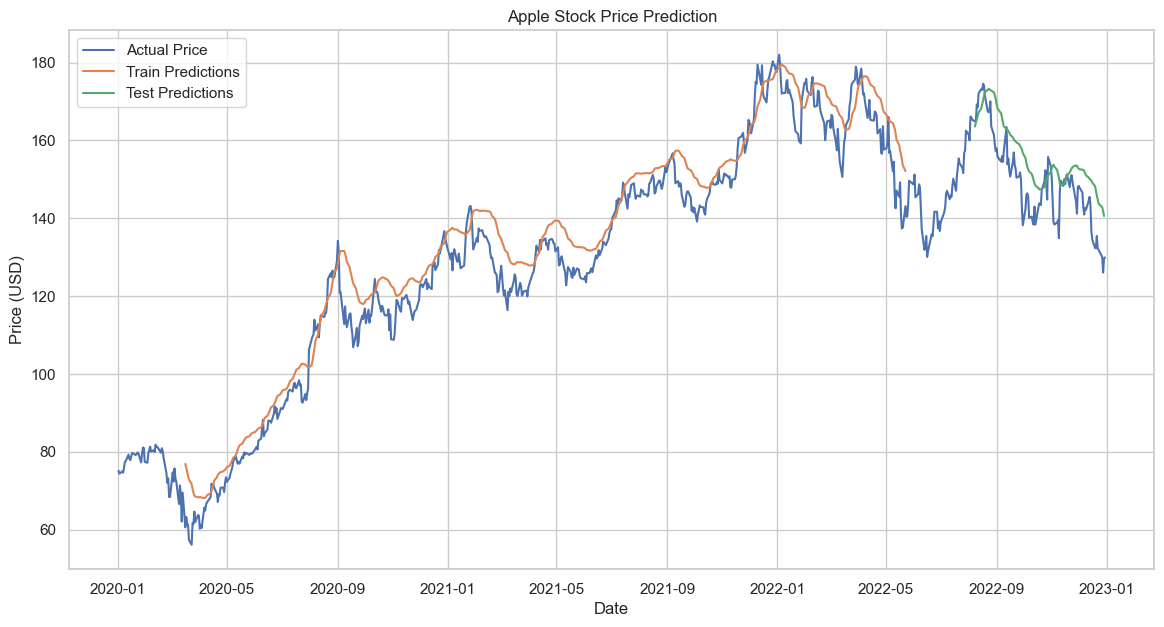

Train RMSE: 6.711141098549091
Test RMSE: 8.700248088623441


In [14]:
# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Actual Price')
plt.plot(data.index[time_step:len(train_predict)+time_step], train_predict, label='Train Predictions')
plt.plot(data.index[len(train_predict)+(time_step*2)+1:len(data)-1], test_predict, label='Test Predictions')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Calculate RMSE
import math
from sklearn.metrics import mean_squared_error

train_rmse = math.sqrt(mean_squared_error(y_train[0], train_predict[:, 0]))
test_rmse = math.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

Interesting results I might say, nearly accurate but there are also many factors to consider. We have to cross validate our data, include the finer details such as the presence of Covid as well as the rise of AI. But overall such a model can help a person try to understand how financial markets work and try to predict the closing prices for following dates.